We will use this dataset to make a super team. One loophole in the analysis is the 'no budget constraint'. But what the heck, clubs are already spending 100 millions on players.
We will not decide the formation now, lets see what players we get and then we can use appropriate formation.
So, this amazing dataset provides 50 attributes to play with.

**Below are the assumptions:**  
1) We have unlimited money to buy them (May be in coming kernels we can put a budget constraint)  
2) Age of the player doesn't matter (Although in real life, it does!)

Load Modules:
-------------

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load DataFrames:
----------------

In [2]:
df = pd.read_csv('../input/FullData.csv')
Names = pd.read_csv('../input/PlayerNames.csv')
df.assign(Index=np.nan)
df['Index'] = [v.split('/')[2] for v in Names['url']]
del df['Nationality']
del df['National_Position']
del df['National_Kit']
df.head()

,Name,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,Preffered_Foot,...,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes,Index
0,Cristiano Ronaldo,Real Madrid,LW,7.0,07/01/2009,2021.0,94,185 cm,80 kg,Right,...,81,76,85,88,14,7,15,11,11,20801
1,Lionel Messi,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,170 cm,72 kg,Left,...,89,90,74,85,14,6,15,11,8,158023
2,Neymar,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,174 cm,68 kg,Right,...,79,84,81,83,15,9,15,9,11,190871
3,Luis Suárez,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,182 cm,85 kg,Right,...,86,84,85,88,33,27,31,25,37,176580
4,Manuel Neuer,FC Bayern,GK,1.0,07/01/2011,2021.0,92,193 cm,92 kg,Right,...,14,11,47,11,91,89,95,90,89,167495


In [3]:
#weigts
a = 0.5
b = 1
c= 2
d = 3

#GoalKeeping Indices
df['gk_Shot_Stopper'] = (b*df.Reactions + b*df.Composure + a*df.Speed + a*df.Strength + c*df.Jumping + b*df.GK_Positioning + c*df.GK_Diving + d*df.GK_Reflexes + b*df.GK_Handling)/(2*a + 4*b + 2*c + 1*d)
df['gk_Sweeper'] = (b*df.Reactions + b*df.Composure + b*df.Speed + a*df.Short_Pass + a*df.Long_Pass + b*df.Jumping + b*df.GK_Positioning + b*df.GK_Diving + d*df.GK_Reflexes + b*df.GK_Handling + d*df.GK_Kicking + c*df.Vision)/(2*a + 4*b + 3*c + 2*d)

#Defending Indices
df['df_Hulk'] = (c*df.Marking + c*df.Sliding_Tackle + c*df.Standing_Tackle + c*df.Aggression + a*df.Reactions + b*df.Interceptions + c*df.Strength)/(5*c + b + a)
df['df_Aerial_Beast'] = (c*df.Marking + b*df.Sliding_Tackle + b*df.Standing_Tackle + c*df.Sliding_Tackle + c*df.Reactions + c*df.Interceptions + b*df.Balance + c*df.Jumping + b*df.Agility + d*df.Heading)/(5*c + 4*b + d)
df['df_Sweeper'] = (c*df.Ball_Control + b*df.Reactions + b*df.Interceptions + d*df.Vision + b*df.Composure + b*df.Short_Pass + b*df.Long_Pass)/(5*b + c + d)
df['df_wb_Wing_Back_Eff'] = (b*df.Ball_Control + a*df.Dribbling + a*df.Marking + c*df.Sliding_Tackle + b*df.Standing_Tackle + c*df.Attacking_Position + d*df.Vision + c*df.Crossing + b*df.Short_Pass + b*df.Long_Pass + d*df.Acceleration +d*df.Speed + c*df.Stamina + a*df.Finishing)/(3*a + 4*b + 4*c + 3*d)

#Midfielding Indices
df['mf_controller'] = (a*df.Weak_foot + c*df.Ball_Control + a*df.Dribbling + a*df.Marking + a*df.Reactions + d*df.Vision + c*df.Composure + d*df.Short_Pass + d*df.Long_Pass)/(2*c + 3*d + 4*a)
df['mf_beast'] = (b*df.Agility + b*df.Balance + b*df.Jumping + c*df.Strength + c*df.Stamina + b*df.Speed + a*df.Acceleration + b*df.Short_Pass + d*df.Aggression + d*df.Reactions + d*df.Marking + c*df.Standing_Tackle + c*df.Sliding_Tackle + d*df.Interceptions)/(1*a + 5*b + 4*c + 4*d)
df['mf_playmaker'] = (b*df.Ball_Control + a*df.Dribbling + a*df.Marking + b*df.Reactions + d*df.Vision + c*df.Crossing + c*df.Short_Pass + c*df.Long_Pass + a*df.Curve + a*df.Long_Shots + c*df.Freekick_Accuracy)/(4*a + 2*b + 4*c + d)
df['mf_attacker'] = (b*df.Ball_Control + c*df.Dribbling + b*df.Vision + b*df.Crossing + b*df.Short_Pass + b*df.Long_Pass + c*df.Agility + a*df.Curve + c*df.Long_Shots + b*df.Freekick_Accuracy + d*df.Finishing)/(a + 6*b + 3*c + d)

#Attackers
df['at_left_wing'] = (c*df.Weak_foot + c*df.Ball_Control + c*df.Dribbling + c*df.Speed + d*df.Acceleration + b*df.Vision + c*df.Crossing + b*df.Short_Pass + b*df.Long_Pass + b*df.Aggression + b*df.Agility + a*df.Curve + c*df.Long_Shots + b*df.Freekick_Accuracy + d*df.Finishing)/(a + 6*b + 6*c + 2*d)
df['at_right_wing'] = (c*df.Weak_foot + c*df.Ball_Control + c*df.Dribbling + c*df.Speed + d*df.Acceleration + b*df.Vision + c*df.Crossing + b*df.Short_Pass + b*df.Long_Pass + b*df.Aggression + b*df.Agility + a*df.Curve + c*df.Long_Shots + b*df.Freekick_Accuracy + d*df.Finishing)/(a + 6*b + 6*c + 2*d)
df['at_striker'] = (b*df.Weak_foot + b*df.Ball_Control + a*df.Vision + b*df.Aggression + b*df.Agility + a*df.Curve + a*df.Long_Shots + d*df.Balance + d*df.Finishing + d*df.Heading + c*df.Jumping + c*df.Dribbling)/(3*a + 4*b + 2*c + 3*d)

df[['Name', 'gk_Shot_Stopper', 'gk_Sweeper', 'df_Hulk', 'df_Aerial_Beast', 'df_Sweeper', 'df_wb_Wing_Back_Eff', 'mf_controller', 'mf_beast', 'mf_playmaker', 'mf_attacker', 'at_left_wing', 'at_right_wing', 'at_striker']].head()

,Name,gk_Shot_Stopper,gk_Sweeper,df_Hulk,df_Aerial_Beast,df_Sweeper,df_wb_Wing_Back_Eff,mf_controller,mf_beast,mf_playmaker,mf_attacker,at_left_wing,at_right_wing,at_striker
0,Cristiano Ronaldo,44.166667,42.882353,44.782609,58.352941,81.2,79.000000,80.000000,60.803922,81.766667,87.838710,80.673469,80.673469,79.729730
1,Lionel Messi,38.250000,41.852941,36.304348,52.941176,84.6,77.666667,85.166667,54.196078,85.833333,90.741935,81.408163,81.408163,80.189189
2,Neymar,36.208333,39.294118,38.782609,52.882353,79.0,76.488889,77.533333,56.058824,79.300000,86.096774,78.918367,78.918367,74.756757
3,Luis Suárez,51.125000,50.147059,54.043478,58.941176,79.8,76.755556,76.500000,64.352941,79.733333,85.419355,77.959184,77.959184,75.135135
4,Manuel Neuer,84.083333,77.235294,31.173913,35.941176,60.5,41.311111,56.833333,41.882353,43.866667,32.258065,34.448980,34.448980,33.405405


 Goal Keeper Selection:
======================

We will use select three GK's. Two shot stoppers and one sweeper.
Hence we define two measures to evaluate the effectiveness of mentioned characteristics.

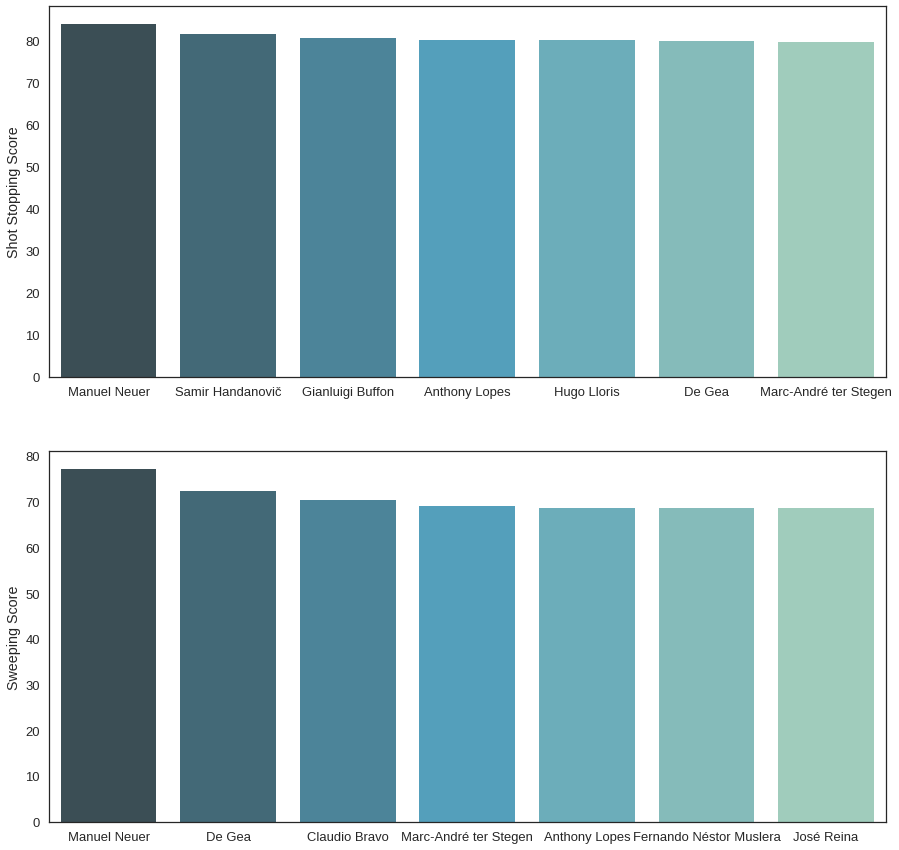

In [4]:
sns.set(style="white", context="talk")

# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15), sharex=False)

# Generate some sequential data
ss = df.sort_values('gk_Shot_Stopper', ascending=False)[:7]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['gk_Shot_Stopper']))
ss = df.sort_values('gk_Sweeper', ascending=False)[:7]
x2 = np.array(list(ss['Name']))
y2 = np.array(list(ss['gk_Sweeper']))

sns.barplot(x1, y1, palette="GnBu_d", ax=ax1)
ax1.set_ylabel("Shot Stopping Score")

sns.barplot(x2, y2, palette="GnBu_d", ax=ax2)
ax2.set_ylabel("Sweeping Score")

Our three choices of Gk are:  
 **1. Neuer  
 2. De Gea  
 3. Handanovic**  

*On a personal level, I'm surprised not to see the likes of Courtois and Lloris in the list!*

Time to get some Defenders:
===========================

We will create below four categories:  
**1) Hulk Defender:** A defender who would show aggression, precision in tackling and lead the defense  
**2) Aerial Beast:** some one who can step up and lead in oppositions aerial attacks and corners  
**3) Sweeper:** To show vision and distribution going forward  
**4) Wing Backs:** Well, because my team need wing backs!

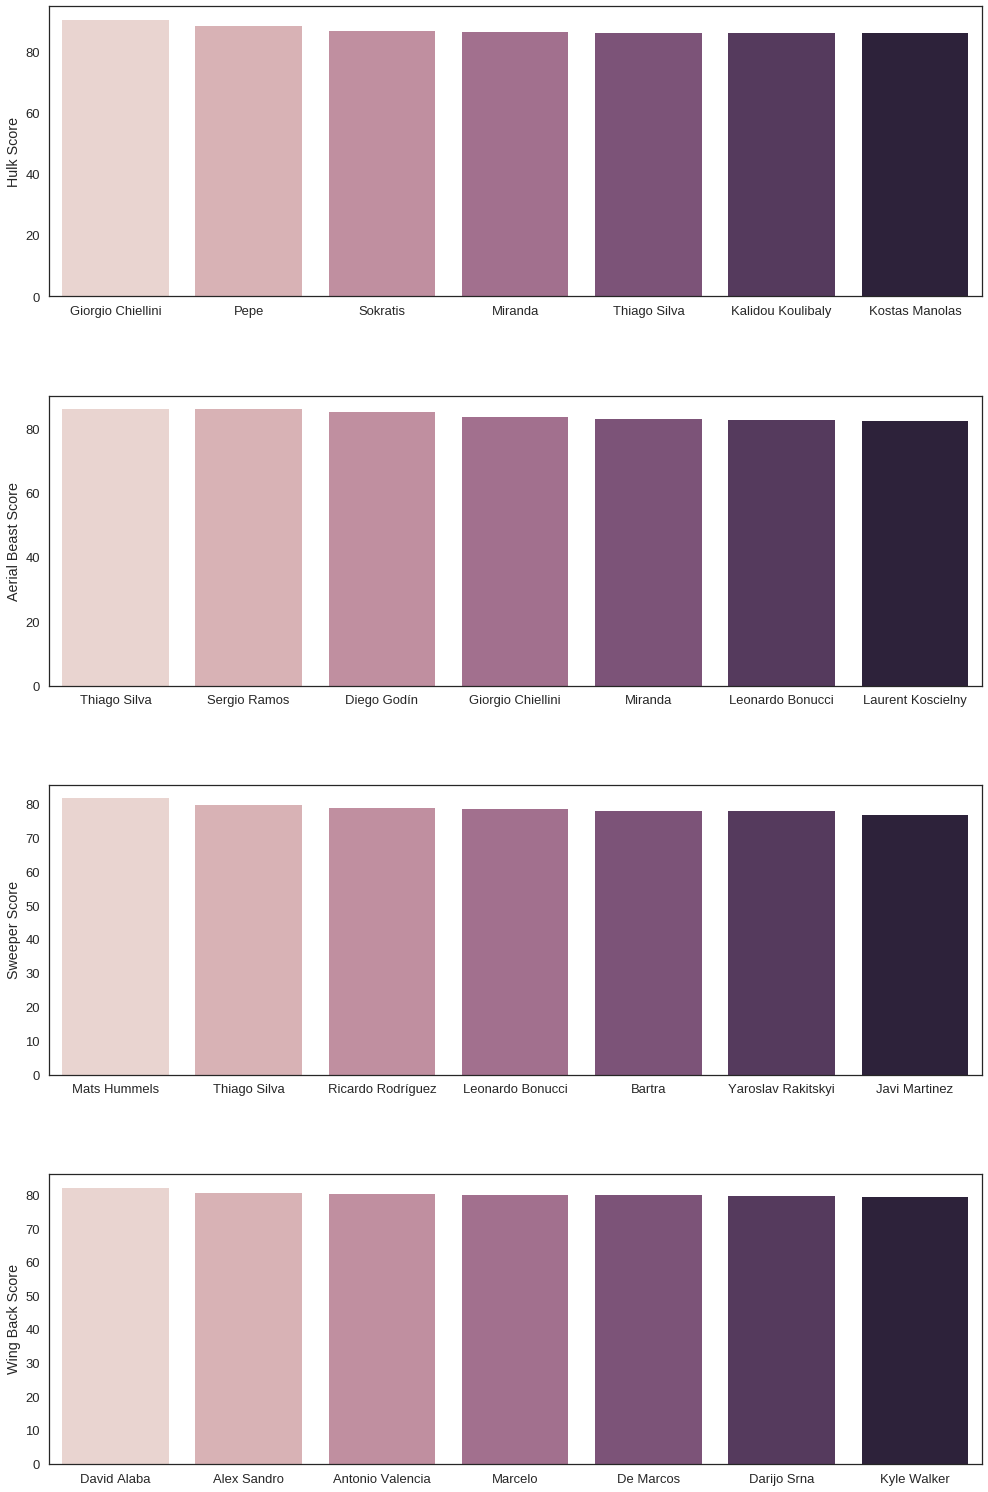

In [5]:
sns.set(style="white", context="talk")

# Set up the matplotlib figure
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 21), sharex=False)

# Generate some sequential data
ss = df[(df['Club_Position'] == 'CB') | (df['Club_Position'] == 'LCB') | (df['Club_Position'] == 'RCB')].sort_values('df_Hulk', ascending=False)[:7]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['df_Hulk']))
ss = df[(df['Club_Position'] == 'CB') | (df['Club_Position'] == 'LCB') | (df['Club_Position'] == 'RCB')].sort_values('df_Aerial_Beast', ascending=False)[:7]
x2 = np.array(list(ss['Name']))
y2 = np.array(list(ss['df_Aerial_Beast']))
ss = df[(df['Club_Position'] == 'CB') | (df['Club_Position'] == 'LCB') | (df['Club_Position'] == 'RCB')].sort_values('df_Sweeper', ascending=False)[:7]
x3 = np.array(list(ss['Name']))
y3 = np.array(list(ss['df_Sweeper']))
ss = df[(df['Club_Position'] == 'LWB') | (df['Club_Position'] == 'LB') | (df['Club_Position'] == 'RWB') | (df['Club_Position'] == 'RB')].sort_values('df_wb_Wing_Back_Eff', ascending=False)[:7]
x4 = np.array(list(ss['Name']))
y4 = np.array(list(ss['df_wb_Wing_Back_Eff']))

sns.barplot(x1, y1, palette=sns.cubehelix_palette(7), ax=ax1)
ax1.set_ylabel("Hulk Score")
sns.barplot(x2, y2, palette=sns.cubehelix_palette(7), ax=ax2)
ax2.set_ylabel("Aerial Beast Score")
sns.barplot(x3, y3, palette=sns.cubehelix_palette(7), ax=ax3)
ax3.set_ylabel("Sweeper Score")
sns.barplot(x4, y4, palette=sns.cubehelix_palette(7), ax=ax4)
ax4.set_ylabel("Wing Back Score")

plt.tight_layout(h_pad=5)

Below are our picks for **Central Defense**:  
**1) Chiellini  
2) Pepe  
3) Thisago Silva  
4) Ramos  
5)  Hummels**  

As much as I want to go with Marcelo, we will stick to top two for wing backs:  
**1) David Alaba  
2) Antonio Valencia**

Top Midfielders
---------------
We have categorized into below categories:
1) Controller
2) Beast (Some to get back the possession, like Kante)
3) Playmaker
4) Attacker

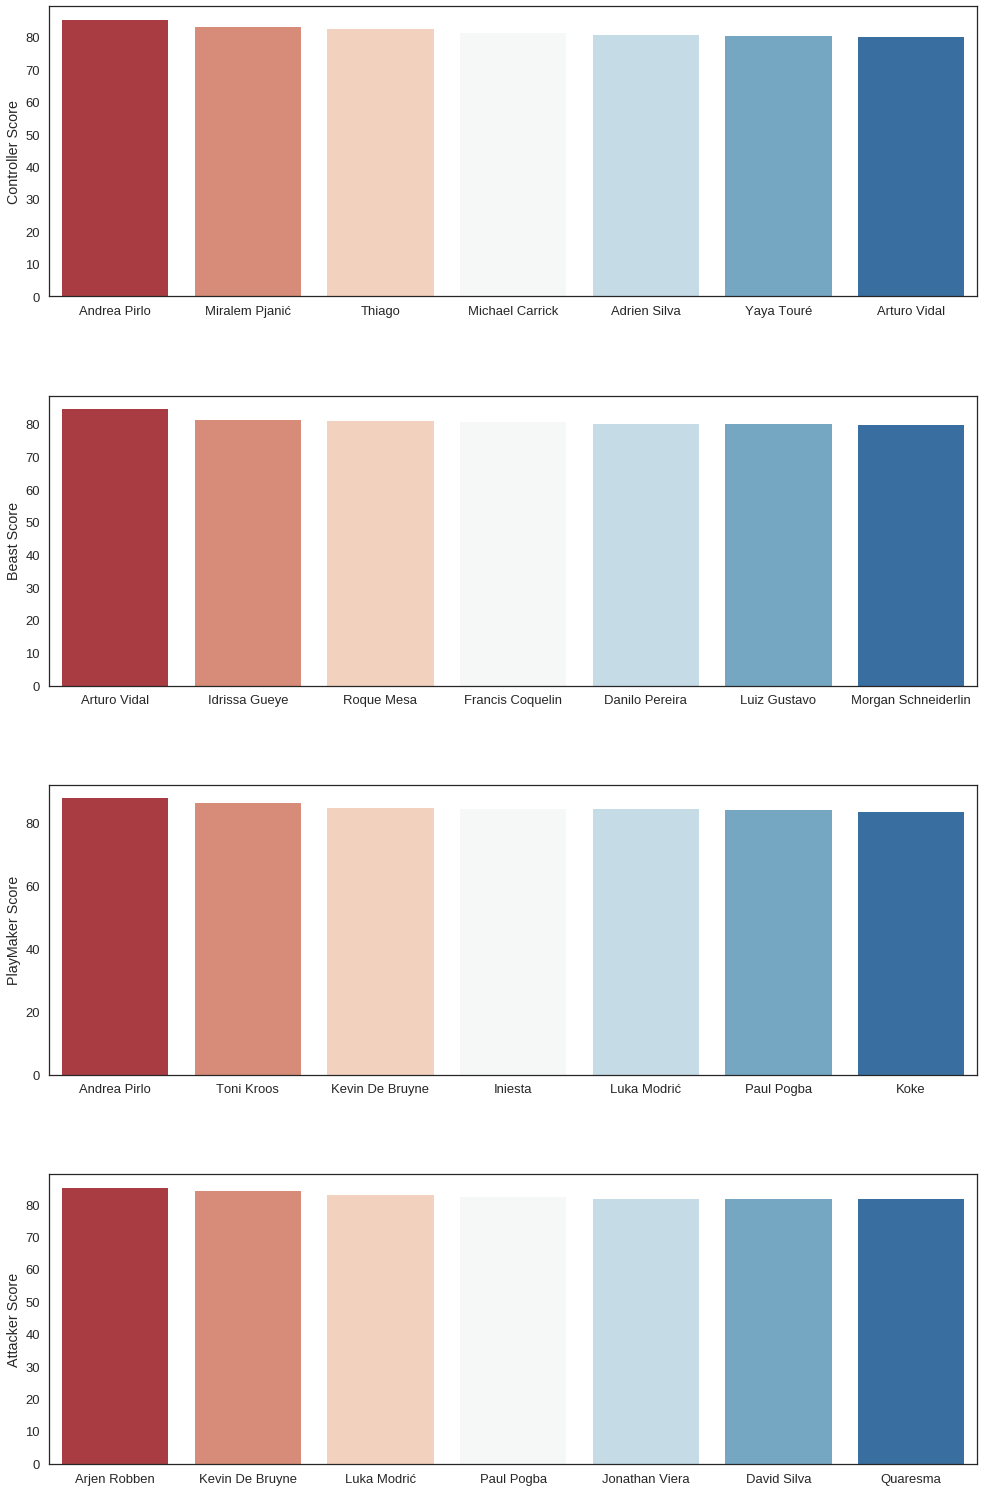

In [6]:
sns.set(style="white", context="talk")

# Set up the matplotlib figure
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 21), sharex=False)

# Generate some sequential data
ss = df[(df['Club_Position'] == 'CDM') | (df['Club_Position'] == 'CM') | (df['Club_Position'] == 'LDM') | (df['Club_Position'] == 'RDM')].sort_values('mf_controller', ascending=False)[:7]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['mf_controller']))
ss = df[(df['Club_Position'] == 'CDM') | (df['Club_Position'] == 'CM') | (df['Club_Position'] == 'LDM') | (df['Club_Position'] == 'RDM')].sort_values('mf_beast', ascending=False)[:7]
x2 = np.array(list(ss['Name']))
y2 = np.array(list(ss['mf_beast']))
ss = df[(df['Club_Position'] == 'CM') | (df['Club_Position'] == 'LCM') | (df['Club_Position'] == 'RCM') | (df['Club_Position'] == 'LM') | (df['Club_Position'] == 'RM')].sort_values('mf_playmaker', ascending=False)[:7]
x3 = np.array(list(ss['Name']))
y3 = np.array(list(ss['mf_playmaker']))
ss = df[(df['Club_Position'] == 'CM') | (df['Club_Position'] == 'LCM') | (df['Club_Position'] == 'RCM') | (df['Club_Position'] == 'LM') | (df['Club_Position'] == 'RM')].sort_values('mf_attacker', ascending=False)[:7]
x4 = np.array(list(ss['Name']))
y4 = np.array(list(ss['mf_attacker']))

sns.barplot(x1, y1, palette=sns.color_palette("RdBu", n_colors=7), ax=ax1)
ax1.set_ylabel("Controller Score")
sns.barplot(x2, y2, palette=sns.color_palette("RdBu", n_colors=7), ax=ax2)
ax2.set_ylabel("Beast Score")
sns.barplot(x3, y3, palette=sns.color_palette("RdBu", n_colors=7), ax=ax3)
ax3.set_ylabel("PlayMaker Score")
sns.barplot(x4, y4, palette=sns.color_palette("RdBu", n_colors=7), ax=ax4)
ax4.set_ylabel("Attacker Score")

plt.tight_layout(h_pad=5)

Below re our picks for the Mid Field:  
**1) Pirlo  
2) Pjanic  
3) Vidal  
4) Gueye (This one is a surprise!)  
5) Kroos  
6) Kevin De Bruyne  
7) Modric**  

We have ignored the Arjen Robben as there might be a label issue, since he usually plays on the wing.

Attack Line:
------------  
We will select 4 wingers (2 RW and 2 LW each! ) and 2 strikers.

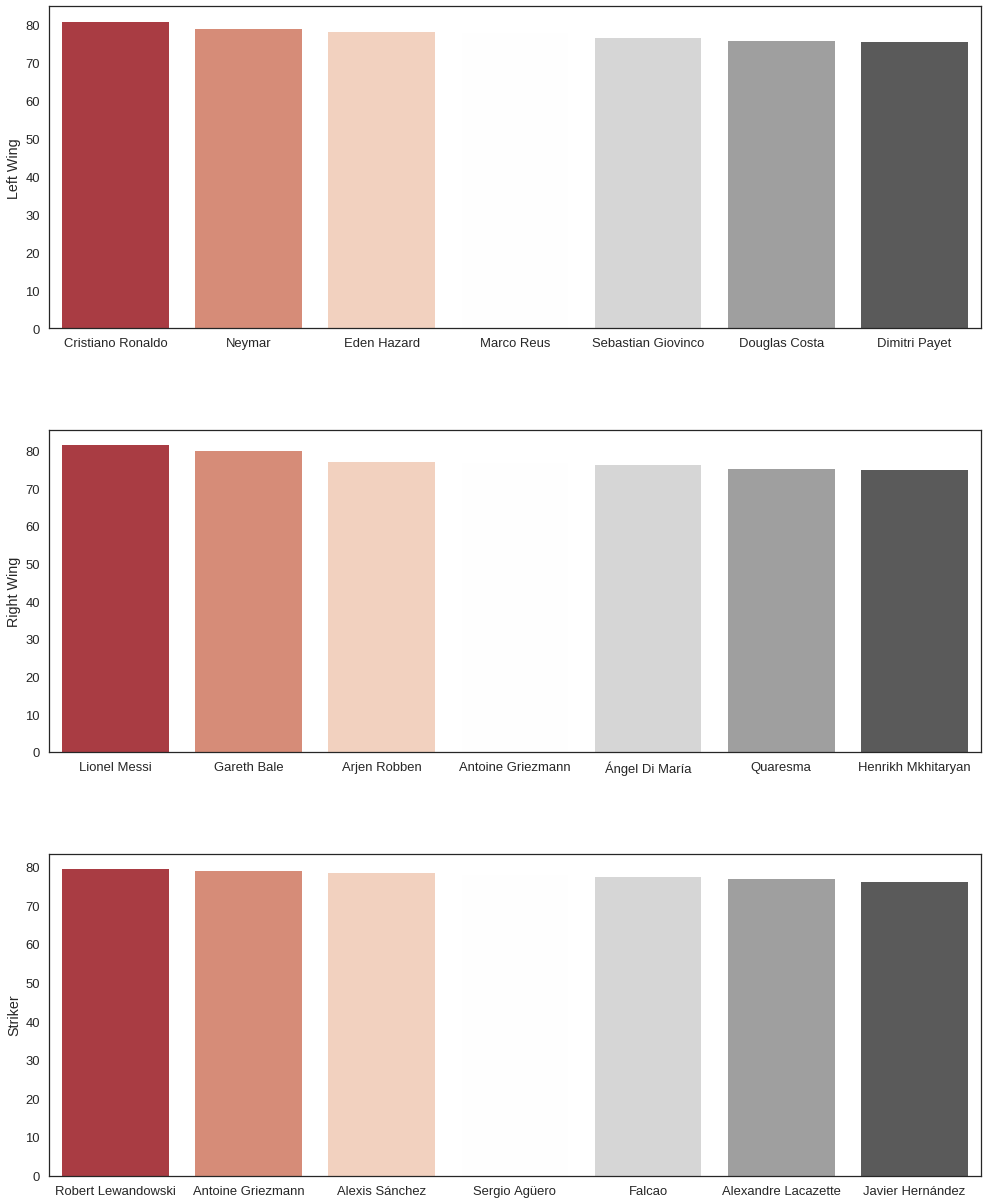

In [9]:
sns.set(style="white", context="talk")

# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 17), sharex=False)

# Generate some sequential data
ss = df[(df['Club_Position'] == 'LW') | (df['Club_Position'] == 'LM') | (df['Club_Position'] == 'LS')].sort_values('at_left_wing', ascending=False)[:7]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['at_left_wing']))
ss = df[(df['Club_Position'] == 'RW') | (df['Club_Position'] == 'RM') | (df['Club_Position'] == 'RS')].sort_values('at_right_wing', ascending=False)[:7]
x2 = np.array(list(ss['Name']))
y2 = np.array(list(ss['at_right_wing']))
ss = df[(df['Club_Position'] == 'ST') | (df['Club_Position'] == 'LS') | (df['Club_Position'] == 'RS') | (df['Club_Position'] == 'CF')].sort_values('at_striker', ascending=False)[:7]
x3 = np.array(list(ss['Name']))
y3 = np.array(list(ss['at_striker']))

sns.barplot(x1, y1, palette=sns.color_palette('RdGy', n_colors=7), ax=ax1)
ax1.set_ylabel("Left Wing")
sns.barplot(x2, y2, palette=sns.color_palette("RdGy", n_colors=7), ax=ax2)
ax2.set_ylabel("Right Wing")
sns.barplot(x3, y3, palette=sns.color_palette("RdGy", n_colors=7), ax=ax3)
ax3.set_ylabel("Striker")

plt.tight_layout(h_pad=5)

So we have below selections:  
**1) Ronaldo  
2) Neymar  
3) Messi  
4) Bale  
5) Lewandowski  
6) Griezmann**  

Our super team from FIFA Dataset is as follows:  
=============================================  
=============================================  
**GK(1): Neuer, De Gea , Handanovic  
CB(2): Chiellini, Pepe, Thisago Silva, Ramos, Hummels  
RWB(1): Antonio Valencia  
LWB(1): David Alaba  
CDM(1): Pirlo, Pjanic, Vidal, Gueye  
CM(2): Kroos, Bruyne, Modric  
LW(1): Ronaldo, Neymar  
RW(1): Messi, Bale  
ST(1): Lewandowski, Griezmann**  

=============================================  
